In [17]:
# IMPORT LIBRARY

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# for plot styling
import seaborn as sns; sns.set()


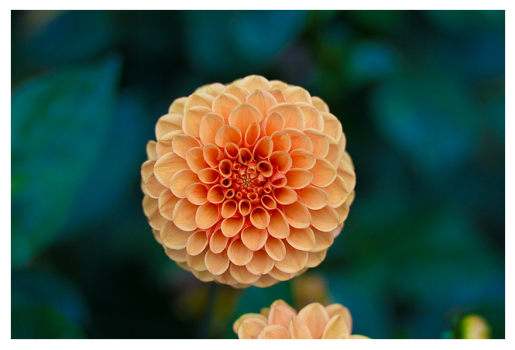

In [18]:
# IMPORTING IMAGE

# importing dataset that the image is from and giving it the name "flower"
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")

# Create a figure and axes
ax = plt.axes(xticks=[], yticks=[])

# Show image
ax.imshow(flower);

In [19]:
# RESHAPING

# Get the shape of the 'flower' array
flower.shape

# Scale the pixel values of 'flower' to be between 0 and 1
data = flower / 255.0

# Reshape the scaled data into a 2D array with 3 columns
data = data.reshape(427 * 640, 3)

# Get the new shape of the 'data' array
data.shape

(273280, 3)

In [20]:
# VISUAL REPRESENTATION OF COLOUR INFORMATION

# If colors parameter is not provided, default to using data itself
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    # Create a figure with two subplots side by side
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Scatter plot of Red vs Green and Red vs Blue with specified colors and marker style and Set labels and limits for subplot
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    # Add a title to the entire figure
    fig.suptitle(title, size=20);

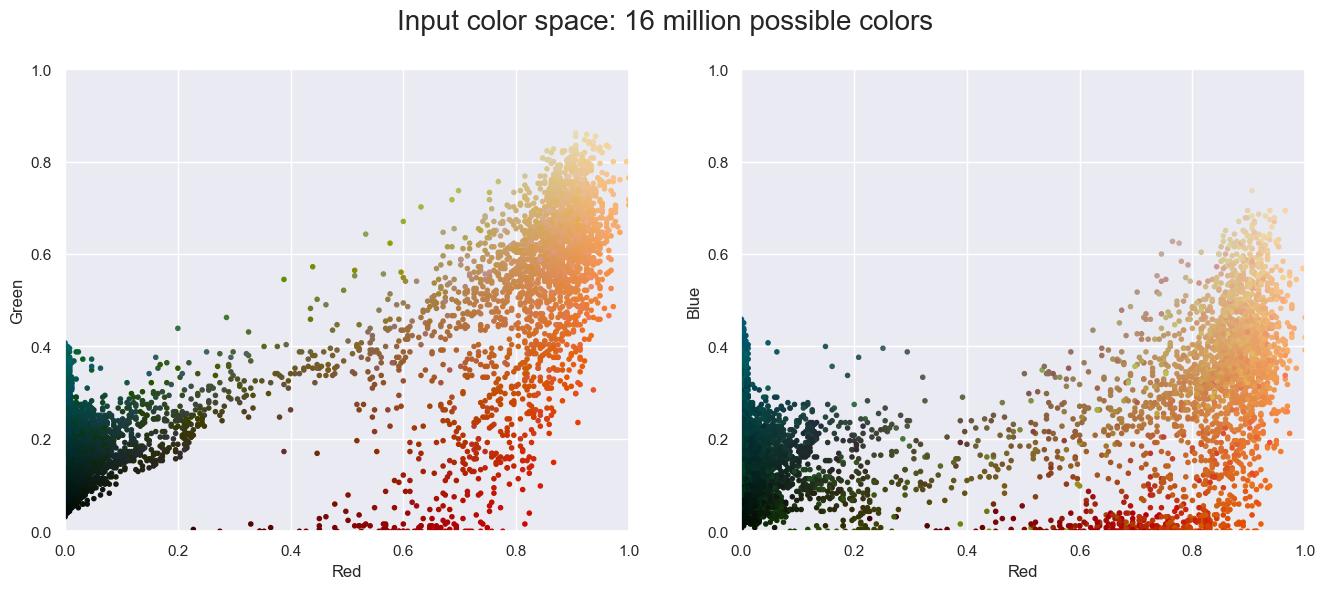

In [21]:
plot_pixels(data, title='Input color space: 16 million possible colors')

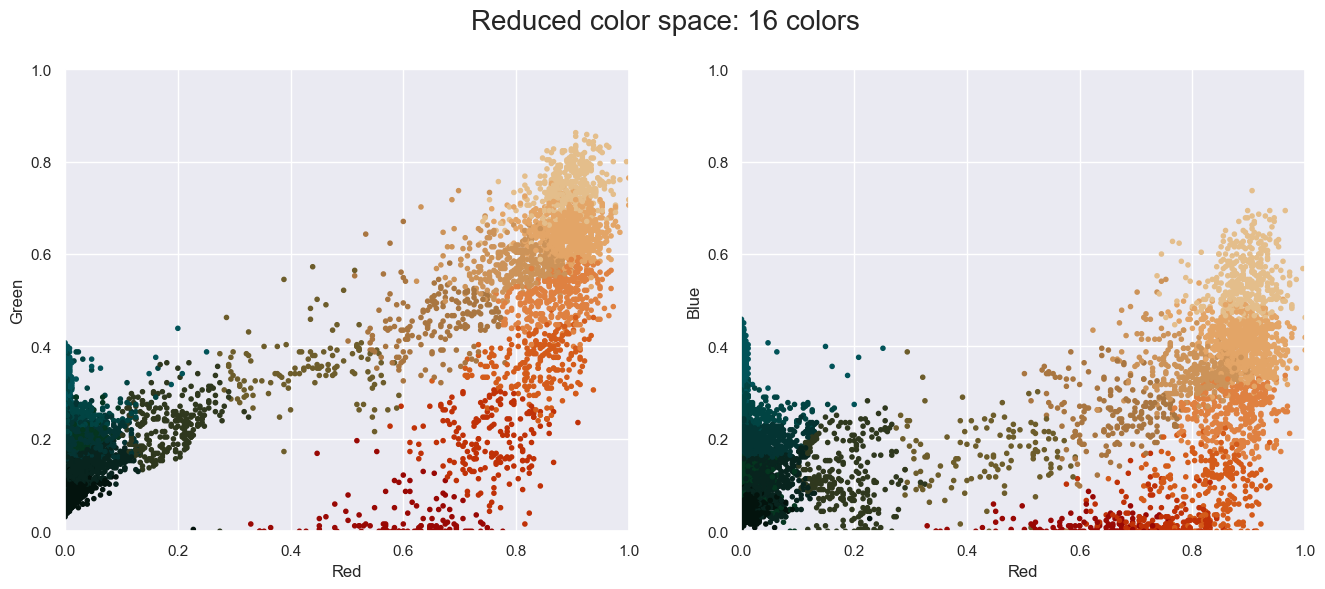

In [22]:
# REDUCE COLOUR

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

# Import the MiniBatchKMeans clustering algorithm from scikit-learn
from sklearn.cluster import MiniBatchKMeans

# How many clusters you want made
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

# Assign each data point to its nearest cluster center and get the new colors
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

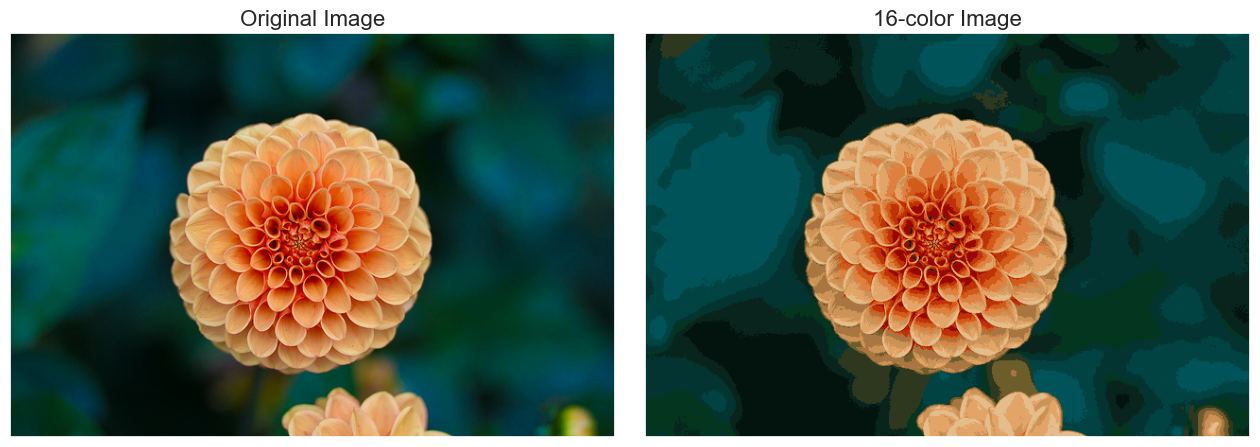

In [23]:
# DISPLAYING NEW IMAGE

# Reshape the 'new_colors' array to match the shape of the original 'flower'
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Display the original image
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)

# Display the recolored image
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);